<a href="https://colab.research.google.com/github/Ravindrakumarnayak/Machine_learning/blob/main/apriori_association.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Titanic.csv")
df

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [ ]:
df.head()

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


In [ ]:
df.tail()

,Class,Gender,Age,Survived
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes
2200,Crew,Female,Adult,Yes


In [ ]:
df.shape

(2201, 4)

In [ ]:
!pip install mlxtend

ValueError: ignored

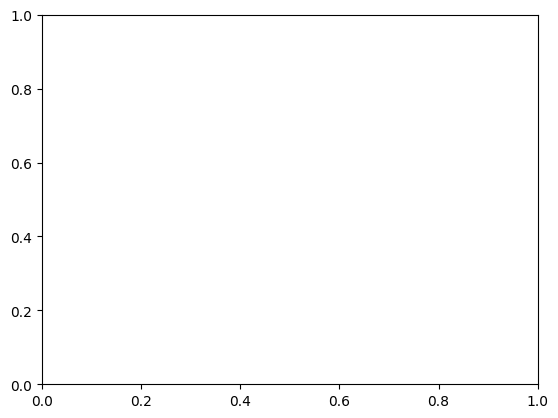

In [ ]:
plt.plot('class','Survived')

In [ ]:
np.df.count['class']

AttributeError: ignored

In [ ]:
import mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import transactionencoder

In [ ]:
titanic=pd.read_csv("/content/Titanic.csv")
titanic

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [ ]:
titanic['Class'].value_counts()


Crew    885
3rd     706
1st     325
2nd     285
Name: Class, dtype: int64

In [ ]:
titanic['Gender'].value_counts()

Male      1731
Female     470
Name: Gender, dtype: int64

In [ ]:
titanic['Age'].value_counts()

Adult    2092
Child     109
Name: Age, dtype: int64

In [ ]:
titanic['Survived'].value_counts()

No     1490
Yes     711
Name: Survived, dtype: int64

In [ ]:
df=pd.get_dummies(titanic)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


In [ ]:
frequent_itemsets=apriori(df,min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
5,0.786461,(Gender_Male)
6,0.950477,(Age_Adult)
7,0.676965,(Survived_No)
8,0.323035,(Survived_Yes)
9,0.144934,"(Age_Adult, Class_1st)"


In [ ]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,"(Age_Adult, Gender_Female)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542
67,(Survived_Yes),"(Age_Adult, Gender_Female)",0.323035,0.193094,0.143571,0.444444,2.301699,0.081195,1.452431
19,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187
18,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634
69,(Gender_Female),"(Survived_Yes, Age_Adult)",0.213539,0.297138,0.143571,0.672340,2.262724,0.080121,2.145099
...,...,...,...,...,...,...,...,...,...
4,(Gender_Male),(Class_3rd),0.786461,0.320763,0.231713,0.294627,0.918520,-0.020555,0.962947
78,"(Gender_Male, Age_Adult, Survived_No)",(Class_3rd),0.603816,0.320763,0.175829,0.291196,0.907823,-0.017853,0.958286
91,(Class_3rd),"(Gender_Male, Age_Adult, Survived_No)",0.320763,0.603816,0.175829,0.548159,0.907823,-0.017853,0.876820
28,"(Gender_Male, Age_Adult)",(Class_3rd),0.757383,0.320763,0.209905,0.277145,0.864016,-0.033036,0.939658


In [ ]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,"(Age_Adult, Gender_Female)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542
67,(Survived_Yes),"(Age_Adult, Gender_Female)",0.323035,0.193094,0.143571,0.444444,2.301699,0.081195,1.452431
19,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187
18,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634
69,(Gender_Female),"(Survived_Yes, Age_Adult)",0.213539,0.297138,0.143571,0.672340,2.262724,0.080121,2.145099
64,"(Survived_Yes, Age_Adult)",(Gender_Female),0.297138,0.213539,0.143571,0.483180,2.262724,0.080121,1.521732
100,"(Class_Crew, Survived_No)","(Gender_Male, Age_Adult)",0.305770,0.757383,0.304407,0.995542,1.314450,0.072822,54.427079
97,"(Gender_Male, Age_Adult)","(Class_Crew, Survived_No)",0.757383,0.305770,0.304407,0.401920,1.314450,0.072822,1.160764
47,"(Gender_Male, Age_Adult)",(Class_Crew),0.757383,0.402090,0.391640,0.517097,1.286022,0.087104,1.238157
50,(Class_Crew),"(Gender_Male, Age_Adult)",0.402090,0.757383,0.391640,0.974011,1.286022,0.087104,9.335480


In [ ]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,0.004587,1.005694
1,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493
8,(Survived_No),(Class_3rd),0.676965,0.320763,0.239891,0.354362,1.104747,0.022745,1.052040
9,(Class_3rd),(Survived_No),0.320763,0.676965,0.239891,0.747875,1.104747,0.022745,1.281251
10,(Gender_Male),(Class_Crew),0.786461,0.402090,0.391640,0.497978,1.238474,0.075412,1.191004
...,...,...,...,...,...,...,...,...,...
101,"(Age_Adult, Survived_No)","(Gender_Male, Class_Crew)",0.653339,0.391640,0.304407,0.465925,1.189676,0.048533,1.139090
102,(Gender_Male),"(Class_Crew, Age_Adult, Survived_No)",0.786461,0.305770,0.304407,0.387060,1.265851,0.063931,1.132622
103,(Class_Crew),"(Gender_Male, Age_Adult, Survived_No)",0.402090,0.603816,0.304407,0.757062,1.253795,0.061619,1.630802
104,(Age_Adult),"(Gender_Male, Class_Crew, Survived_No)",0.950477,0.304407,0.304407,0.320268,1.052103,0.015075,1.023334


In [6]:
st.norm.cdf(1)

NameError: ignored

In [5]:

from scipy import norm

ImportError: ignored